# Kmeans
## Caso: Mall Customer Segmentation Data

### Context
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

### Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

### Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

Source: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
os.chdir('c:\\Users\\USUARIO\\Desktop\\Trabajo\\Iberoamericana\\Cursos\\IA')
print(os.getcwd())
print(os.listdir())

c:\Users\USUARIO\Desktop\Trabajo\Iberoamericana\Cursos\IA
['3-4_svm-avanzado.ipynb', '3_1_K_means.ipynb', '4. SVM.ipynb', 'Data set', 'kmeans customer.ipynb', 'Sesion 1.ipynb', 'Sesion 3.ipynb']


In [3]:
# Import and pre-visualization
df = pd.read_csv('Data set/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print(df.shape)
print(df.columns)

(200, 5)
Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


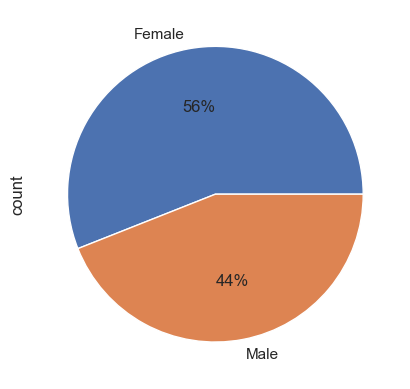

In [7]:
df['Genre'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

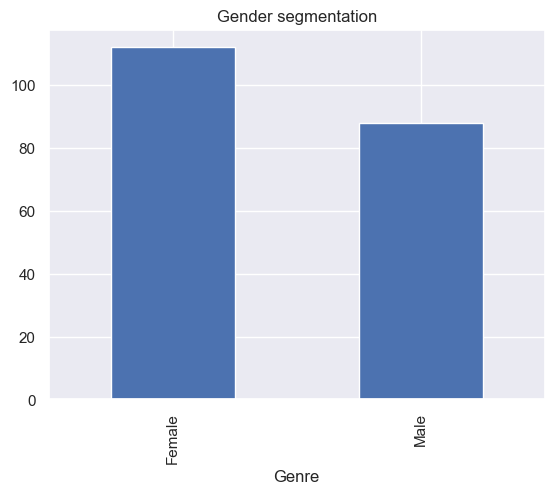

In [8]:
df['Genre'].value_counts().plot(kind='bar')
plt.title('Gender segmentation')
plt.show()

In [9]:
df['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

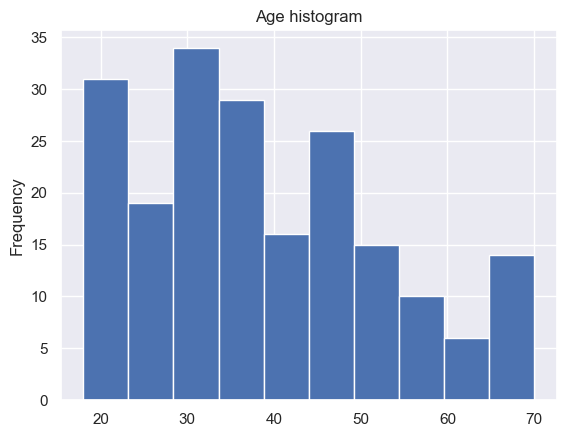

In [151]:
# Análisis de edad

x = df['Age'].plot(kind='hist')
plt.title('Age histogram')
plt.show()

In [10]:
# Genre as dummy variable

df['Genre'] = df['Genre'].map({"Male":1,"Female":0})
df['Genre'].value_counts()

Genre
0    112
1     88
Name: count, dtype: int64

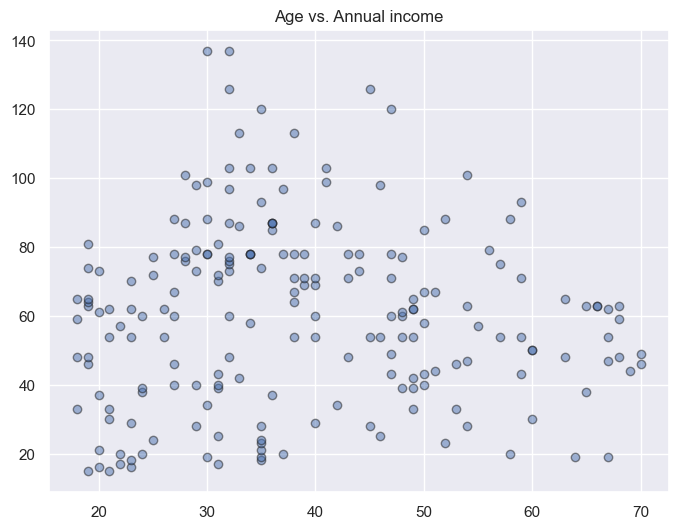

In [11]:
# Edad e ingresos anuales

plt.figure(figsize=(8, 6))
plt.title('Age vs. Annual income')
plt.scatter(x= df['Age'], y =  df['Annual Income (k$)'], alpha=0.5, c='b', edgecolors='k')
plt.show()

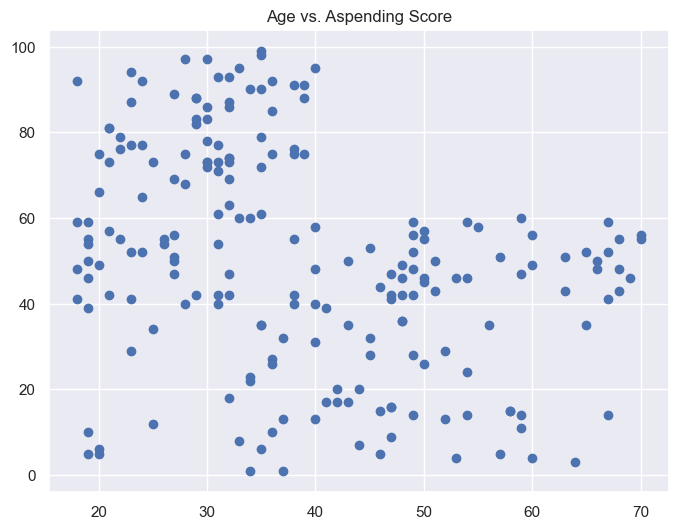

In [12]:
# Edad y puntaje de gasto

plt.figure(figsize=(8, 6))
plt.title('Age vs. Aspending Score')
plt.scatter(x= df['Age'], y =  df['Spending Score (1-100)'])
plt.show()


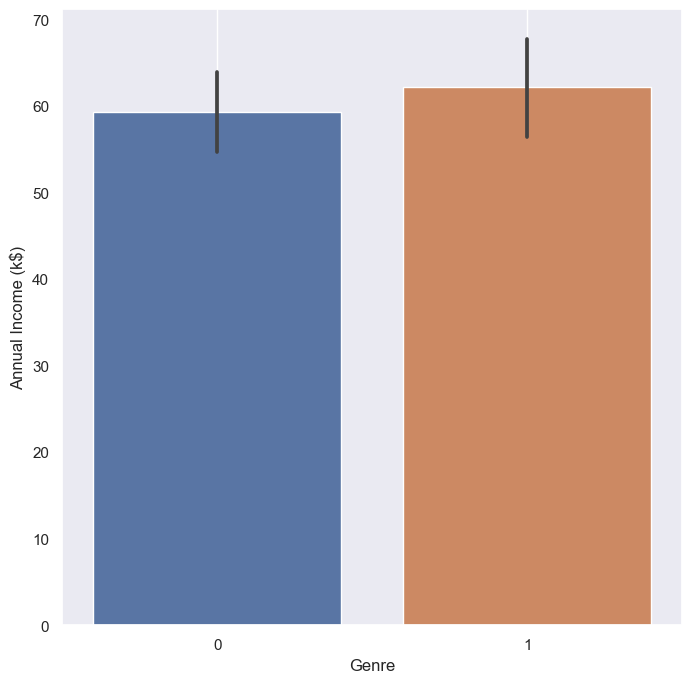

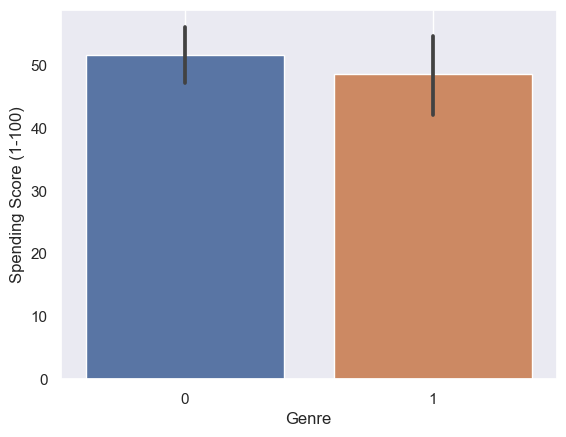

In [13]:
f = ['Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(figsize=(8,8))
for i in f:
    sns.barplot(x='Genre',y= i,data=df)
    plt.grid()
    plt.show()

In [14]:
# Correlation matrix

df.iloc[:,1:].corr()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
Genre,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


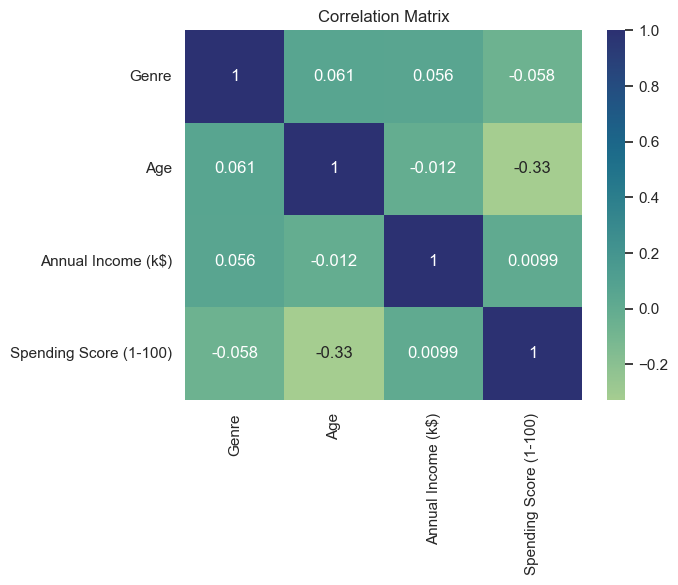

In [15]:
# Heatmap of correlation matrix

sns.heatmap(df.iloc[:, 1:].corr(), annot = True, cmap = "crest")
plt.title('Correlation Matrix')
plt.show()

In [19]:
df = df.drop('CustomerID', axis=1)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [20]:
# Kmeans model

from sklearn.cluster import KMeans

In [21]:
# How many clusters (k) are required?
# Elbow method

WCSS = [] #"Within-Cluster-Sum-of-Squares"

for i in range(1,11):
    kmeans = KMeans(n_clusters= i,init='k-means++',random_state=0) #pruebas k
    kmeans.fit(df) #entrenamiento
    WCSS.append(kmeans.inertia_) #guardamos resultados
    

c:\Users\USUARIO.DESKTOP-VVDFT1P\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USUARIO.DESKTOP-VVDFT1P\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USUARIO.DESKTOP-VVDFT1P\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USUARIO.DESKTOP-VVDFT1

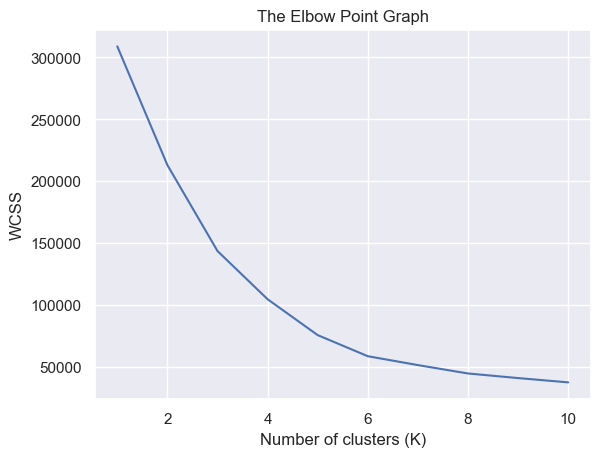

In [22]:
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans_model = KMeans(n_clusters=5, init='k-means++',random_state=0)

In [24]:
# Prediction

y = kmeans_model.fit_predict(df)

c:\Users\USUARIO.DESKTOP-VVDFT1P\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
len(y)
print(y)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 4 1 2 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 2 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


In [26]:
pd.Series(y).value_counts()

2    79
1    39
4    36
0    23
3    23
Name: count, dtype: int64

In [41]:
# Centroid points
kmeans_model.cluster_centers_

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333]])

In [46]:
df.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

C:\Users\USUARIO.DESKTOP-VVDFT1P\AppData\Local\Temp\ipykernel_14520\2511173002.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, palette = "viridis")


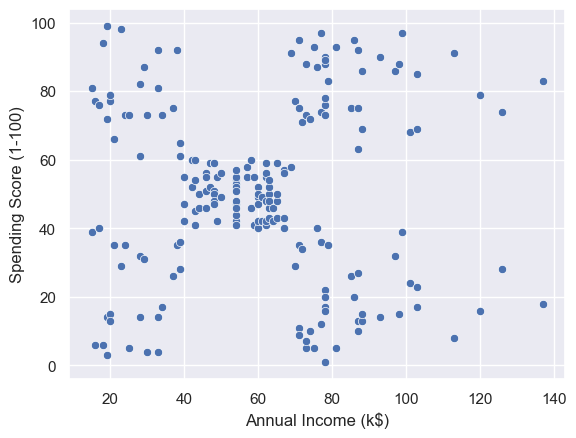

In [29]:
#View data points before clustering them

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, palette = "viridis")
plt.show()

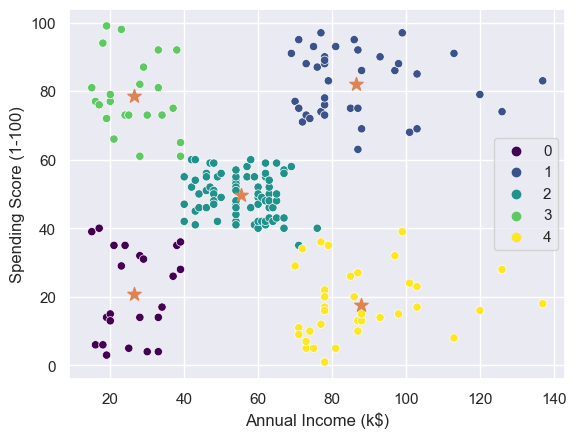

In [60]:
# Kmeans
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue= y, data=df, palette = "viridis")
plt.scatter(kmeans_model.cluster_centers_[:,2],kmeans_model.cluster_centers_[:,3],marker='*',s=100)
plt.show()

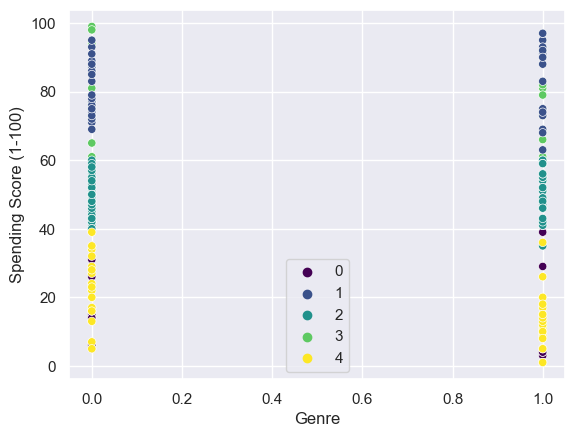

In [39]:
sns.scatterplot(x='Genre', y='Spending Score (1-100)', hue= y, data=df, palette = "viridis")
plt.show()

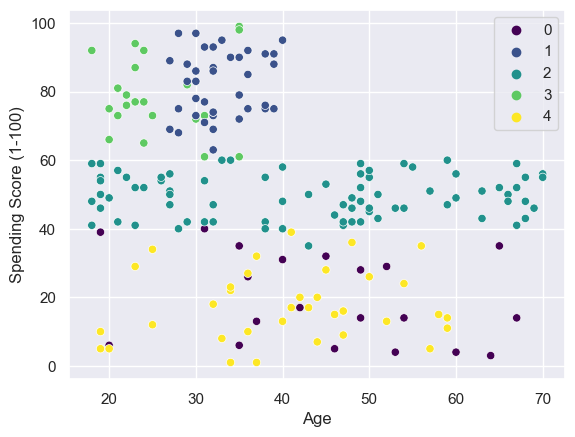

In [33]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue= y, data=df, palette = "viridis")

plt.show()

c:\Users\USUARIO.DESKTOP-VVDFT1P\AppData\Local\Programs\Python\Python311\Lib\site-packages\mpl_toolkits\mplot3d\art3d.py:1104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
c:\Users\USUARIO.DESKTOP-VVDFT1P\AppData\Local\Programs\Python\Python311\Lib\site-packages\mpl_toolkits\mplot3d\art3d.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


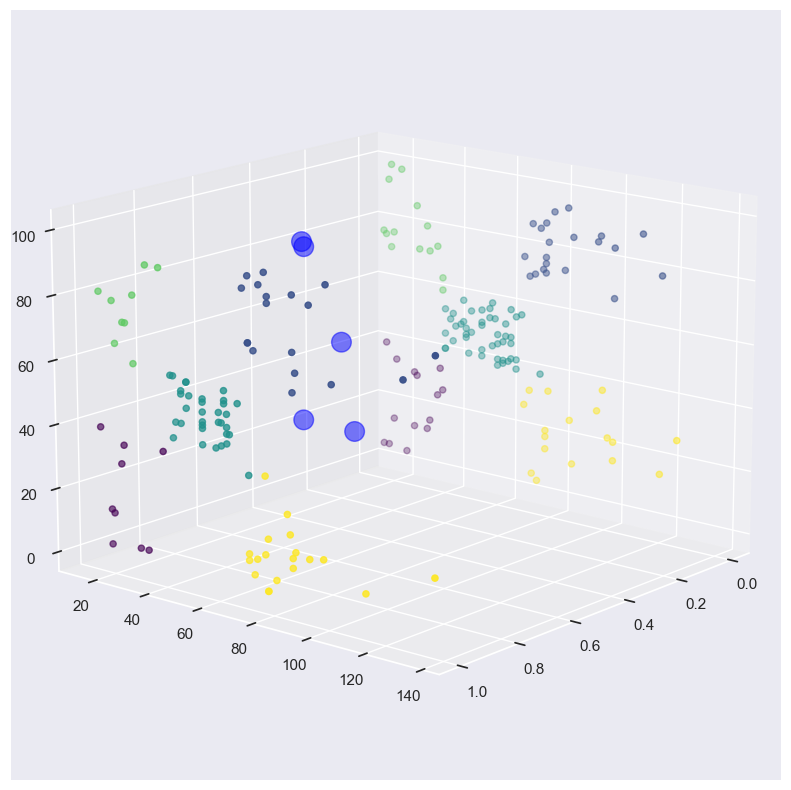

In [61]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


ax.view_init(15, 40)

ax.scatter(df['Genre'], df['Annual Income (k$)'],df['Spending Score (1-100)'],c= y,cmap='viridis')
ax.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,1],kmeans_model.cluster_centers_[:,2],kmeans_model.cluster_centers_[:,3],c ='blue',s=200,alpha = 0.5)

plt.show()